# caustique d'onde

In [1]:
import os
import numpy as np
import MotionClouds as mc
from caustique import init, Caustique

In [2]:
import datetime
date = datetime.datetime.now().date().isoformat()
tag = f'{date}_caustique'
tag = '2020-06-18_caustique'
print(f'Tagging our simulations with tag={tag}')

Tagging our simulations with tag=2020-06-18_caustique


In [3]:
opt = init()
opt.tag = tag

In [4]:
opt

Namespace(B_V=2.0, B_sf=0.001, B_theta=0.2617993877991494, H=125.0, V_X=0.5, V_Y=0.5, bin_dens=2, fps=18, nframe=128, nx=1280, ny=2048, seed=42, sf_0=0.002, tag='2020-06-18_caustique', theta=1.5707963267948966, verbose=False)

# une simple caustique

In [5]:
gifname = f'{opt.tag}/{opt.tag}.gif'
if not os.path.isfile(gifname):
    c = Caustique(opt)
    z = c.wave()
    gifname = c.plot(z)

In [6]:
if not os.path.isfile(f'{opt.tag}/{opt.tag}.{mc.vext}'):
    c = Caustique(opt)
    z = c.wave()
    mc.anim_save(z.swapaxes(0, 1), f'{opt.tag}/{opt.tag}')
mc.in_show_video(f'{opt.tag}', figpath=f'{opt.tag}')

""


In [7]:
from IPython.display import Image, display
width = 1024
display(Image(url=gifname, width=width))

## exploring parameters

In [8]:
N_scan = 9
base = 4

In [9]:
opt = init()
opt.tag = tag
opt.bin_dens = 3
opt.verbose = True

c = Caustique(opt)
z = None
for H_ in c.opt.H*np.logspace(-1, 1, N_scan, base=base):
    print(f'H = {H_:.3f}')
    c.opt.H = H_
    gifname=f'{opt.tag}/{opt.tag}_H={H_:.3f}.gif'
    if not os.path.isfile(gifname):
        if z is None:
            z = c.wave()
        url=c.plot(z, gifname=gifname)
    display(Image(url=gifname, width=width))

H = 31.250


H = 44.194


H = 62.500


H = 88.388


H = 125.000


H = 176.777


H = 250.000


H = 353.553


H = 500.000


======sf_0======
sf_0=sf_0(default)*0.250=5.000E-04


sf_0=sf_0(default)*0.354=7.071E-04


sf_0=sf_0(default)*0.500=1.000E-03


sf_0=sf_0(default)*0.707=1.414E-03


sf_0=sf_0(default)*1.000=2.000E-03


sf_0=sf_0(default)*1.414=2.828E-03


sf_0=sf_0(default)*2.000=4.000E-03


sf_0=sf_0(default)*2.828=5.657E-03


sf_0=sf_0(default)*4.000=8.000E-03


======B_sf======
B_sf=B_sf(default)*0.250=2.500E-04


B_sf=B_sf(default)*0.354=3.536E-04


B_sf=B_sf(default)*0.500=5.000E-04


B_sf=B_sf(default)*0.707=7.071E-04


B_sf=B_sf(default)*1.000=1.000E-03


B_sf=B_sf(default)*1.414=1.414E-03


B_sf=B_sf(default)*2.000=2.000E-03


B_sf=B_sf(default)*2.828=2.828E-03


B_sf=B_sf(default)*4.000=4.000E-03


======B_theta======
B_theta=B_theta(default)*0.250=6.545E-02


B_theta=B_theta(default)*0.354=9.256E-02


B_theta=B_theta(default)*0.500=1.309E-01


B_theta=B_theta(default)*0.707=1.851E-01


B_theta=B_theta(default)*1.000=2.618E-01


B_theta=B_theta(default)*1.414=3.702E-01


B_theta=B_theta(default)*2.000=5.236E-01


B_theta=B_theta(default)*2.828=7.405E-01


B_theta=B_theta(default)*4.000=1.047E+00


======B_V======
B_V=B_V(default)*0.250=5.000E-01


B_V=B_V(default)*0.354=7.071E-01


B_V=B_V(default)*0.500=1.000E+00


B_V=B_V(default)*0.707=1.414E+00


B_V=B_V(default)*1.000=2.000E+00


B_V=B_V(default)*1.414=2.828E+00


B_V=B_V(default)*2.000=4.000E+00


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/2020-06-18_caustique/2020-06-18_caustique_B_V*=2.000.gif_frame_0.png'

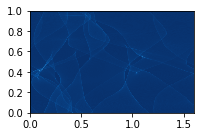

In [10]:
opt = init()

for variable in ['sf_0', 'B_sf', 'B_theta', 'B_V', 'V_X', 'V_Y']:
    print(f'======{variable}======')
    for modul in np.logspace(-1, 1, N_scan, base=base):
        opt = init()
        opt.tag = tag
        opt.bin_dens = 6

        c = Caustique(opt)
        c.d[variable] *= modul

        print(f'{variable}={variable}(default)*{modul:.3f}={c.d[variable]:.3E}')
        gifname = f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}.gif'
        if not os.path.isfile(gifname):
            z = c.wave()
            if not os.path.isfile(f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}.{mc.vext}'): 
                mc.anim_save(z.swapaxes(0, 1), f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}')
            url=c.plot(z, gifname=gifname)
        display(Image(url=gifname, width=width))